<a href="https://colab.research.google.com/github/GabrielSYS/Cryptocurrency/blob/main/crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parte desse código foi copiado do curso de Machine Learning da Google:
https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb?hl=en


e estou estudando e analisando seu elementos

+++++++++++++++++++++++++++++++++++++++++++++

olhar no final do codigo, pq é o que eu estou fazendo.... com relação a esse codigo seria a parte que fica abaixo do importanto as bibliotecas

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [2]:
#@title Codificação da tabela csv
import chardet

with open('BTC-USD.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result['encoding'])

ascii


In [3]:
import csv

with open('BTC-USD.csv', 'r', encoding="ascii") as f:
    content = f.read()
    dialect = csv.Sniffer().sniff(content)
    delimiter = dialect.delimiter

print(delimiter)


,


In [4]:
import pandas as pd

df = pd.read_csv('BTC-USD.csv', encoding='ascii', delimiter=',')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# tratamento de dados

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [6]:
df.shape


(2713, 7)

In [7]:
print(df.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


<Axes: title={'center': 'BTC Stocks'}>

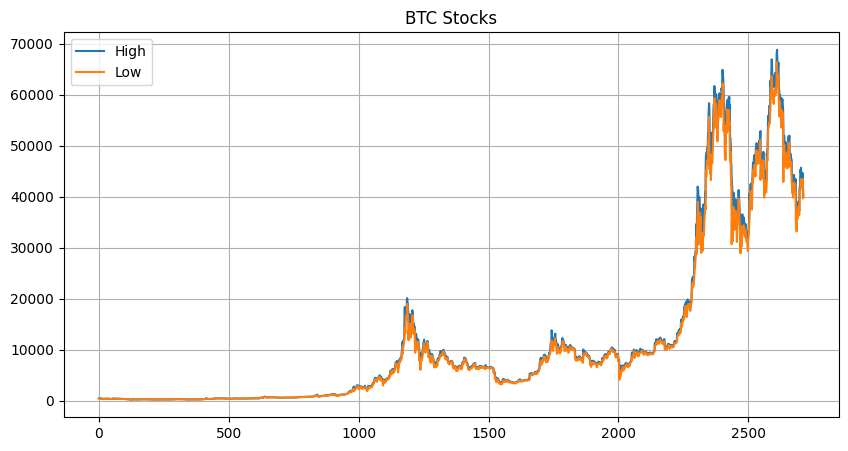

In [21]:
df[['High', 'Low']].plot(figsize=(10, 5), title='BTC Stocks', grid=True)

In [8]:
#@title Importando as bibliotecas
#  import pandas as pd - já foi importada
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error



In [30]:
#@title criando label e feature:
x = df.iloc[:, [2, 3]]
y = df.Volume


train_X, val_X, train_y, val_y = train_test_split(x, y, random_state=1)

model = DecisionTreeRegressor(random_state=1)
model.fit(train_X, train_y)

val_predictions = model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))



Validation MAE: 6,691,814,514


In [ ]:

from sklearn.preprocessing import LabelEncoder
label_X = LabelEnconder()
X[:, 2,3] = LabelEnconder_X.fit_transform(X[:, 2,3])

print(x)



In [ ]:
#@title Modelo de treinamento

x = df.iloc[:,:].values
from sklearn.input import SimpleInputer


def build_model(my_learning_rate):
  """Criando modelo de regressão linear"""

  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))

  # Compile the model topography into code that
  # TensorFlow can efficiently execute. Configure
  # training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the
  # model. The model will train for the specified number
  # of epochs, gradually learning how the feature values
  # relate to the label values.
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the
  # rest of history.
  epochs = history.epoch

  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean
  # squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

In [ ]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

In [ ]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

In [ ]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
learning_rate=0.01
epochs= ?   # Replace ? with an integer.
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
#@title Double-click to view a possible solution
learning_rate=0.01
epochs=450
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# The loss curve suggests that the model does converge.

In [ ]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100
epochs=500

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
# Set the learning rate and number of epochs
learning_rate= ?  # Replace ? with a floating-point number
epochs= ?   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
+++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_a_real_dataset.ipynb?hl=en#scrollTo=RomQTd1OPVd0

In [ ]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [ ]:
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000

In [ ]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

In [ ]:
# Get statistics on the dataset.
training_df.describe()


In [ ]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

In [ ]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based
# solely on total_rooms.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [ ]:
predict_house_values(10, my_feature, my_label)

In [ ]:
my_feature = "?"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 2
epochs = 3
batch_size = 120

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

In [ ]:
#@title Double-click to view a possible solution.

my_feature = "population" # Pick a feature other than "total_rooms"

# Possibly, experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything below.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

In [ ]:
# Define a synthetic feature named rooms_per_person
training_df["rooms_per_person"] = ? # write your code here.

# Don't change the next line.
my_feature = "rooms_per_person"

# Assign values to these three hyperparameters.
learning_rate = ?
epochs = ?
batch_size = ?

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

In [ ]:
#@title Double-click to view a possible solution to Task 4.

# Define a synthetic feature
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)

In [ ]:
# Generate a correlation matrix.
training_df.corr()

In [ ]:
#@title Double-click here for the solution to Task 5

# The median_income correlates 0.7 with the label
# (median_house_value), so median_income might be a
# good feature. The other seven potential features
# all have a correlation relatively close to 0.

# If time permits, try median_income as the feature
# and see whether the model improves.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

estou fazendo esse

In [9]:
#@ title Importando biblioteca conforme SKlearn

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [45]:
x = df.iloc[:, [2, 3]].values
y = df["Volume"].values

train_X, val_X, train_y, val_y = train_test_split(x, y, random_state=1)

model = DecisionTreeRegressor(random_state=1)
model.fit(train_X, train_y)

val_predictions = model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))



Validation MAE: 6,691,814,514


In [ ]:

train_X, val_X, train_y, val_y = train_test_split(x, y, random_state=1)

model = DecisionTreeRegressor(random_state=1)
model.fit(train_X, train_y)

val_predictions = model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))


In [43]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=10
)

regr_1.fit(x, y)
regr_2.fit(x, y)

y_1 = regr_1.predict(x)
y_2 = regr_2.predict(x)

ValueError: ignored

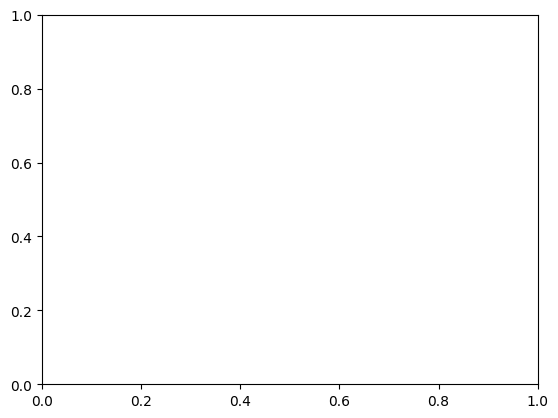

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(x, y, color=colors[0], label="training samples")
plt.plot(x, y_1, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(x, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

abaixo um exemplo plotado de árvore de decisão

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:

from sklearn.preprocessing import LabelEncoder
label_X = LabelEnconder()
X[:, 2,3] = LabelEnconder_X.fit_transform(X[:, 2,3])

print(x)

In [ ]:
#para validação do modelo
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(classifier_dt, X, y,
                            scoring='accuracy', cv=5)

print(scores_dt.mean())